<a href="https://colab.research.google.com/github/Felipepa9/MADSI/blob/main/Seccion_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 12
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
data_raw = pd.read_csv('/content/drive/MyDrive/MOD. Y SIST. INTELIGENTES/SECCION_4.csv')
data_raw.head()

,flight_date,pax_weight_kg_qty,crew_bags_gross_weight_kg_qty,pax_bags_gross_weight_kg_qty,cargo_gross_weight_kg_qty,maximum_payload_kg_qty
0,2025-04-20,25118.0,0,2233,526,17316
1,2025-04-04,9056.0,0,593,0,19848
2,2025-04-16,20168.0,0,1284,360,12728
3,2025-05-08,13318.0,0,1536,217,17828
4,2025-04-12,23716.0,0,1516,0,15614


In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142754 entries, 0 to 142753
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   flight_date                    142754 non-null  object 
 1   pax_weight_kg_qty              142705 non-null  float64
 2   crew_bags_gross_weight_kg_qty  142754 non-null  int64  
 3   pax_bags_gross_weight_kg_qty   142754 non-null  int64  
 4   cargo_gross_weight_kg_qty      142754 non-null  int64  
 5   maximum_payload_kg_qty         142754 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 6.5+ MB


In [4]:
data_raw = data_raw.drop('flight_date', axis=1)
data_raw.head()
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142754 entries, 0 to 142753
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   pax_weight_kg_qty              142705 non-null  float64
 1   crew_bags_gross_weight_kg_qty  142754 non-null  int64  
 2   pax_bags_gross_weight_kg_qty   142754 non-null  int64  
 3   cargo_gross_weight_kg_qty      142754 non-null  int64  
 4   maximum_payload_kg_qty         142754 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 5.4 MB


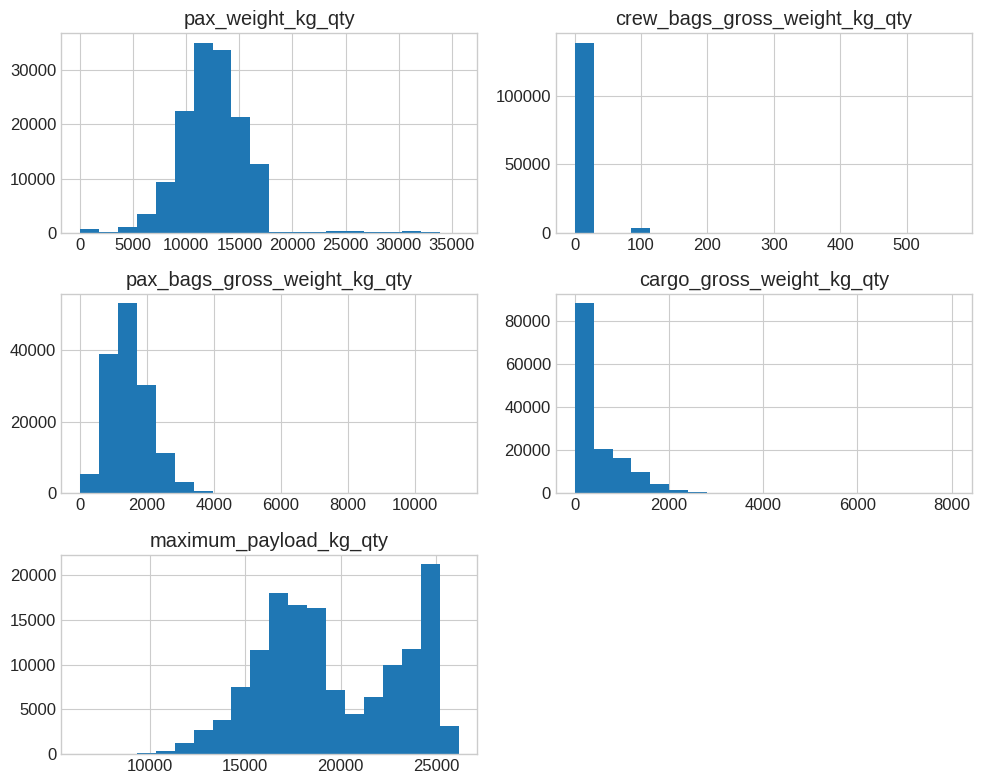

In [5]:
data_raw.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

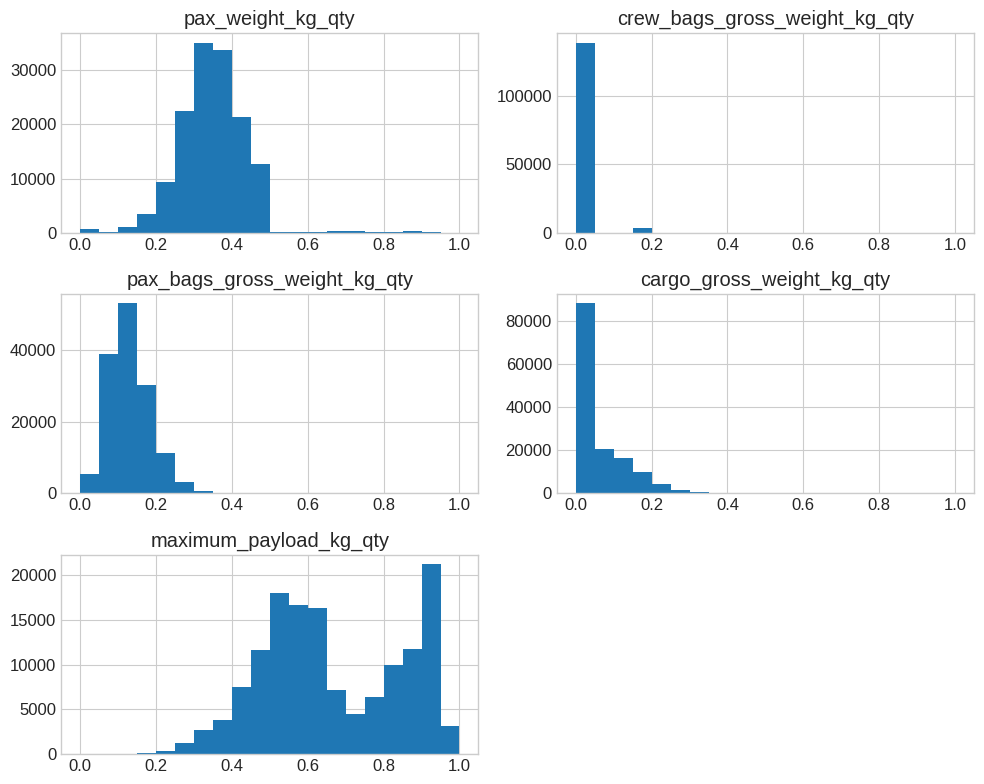

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_raw)
data_normalized = pd.DataFrame(data_normalized, columns=data_raw.columns)
data_normalized.head()
data_normalized.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

In [7]:
data_normalized.head()

,pax_weight_kg_qty,crew_bags_gross_weight_kg_qty,pax_bags_gross_weight_kg_qty,cargo_gross_weight_kg_qty,maximum_payload_kg_qty
0,0.704730,0.0,0.197436,0.065504,0.552846
1,0.254082,0.0,0.052431,0.000000,0.680705
2,0.565849,0.0,0.113528,0.044832,0.321163
3,0.373660,0.0,0.135809,0.027024,0.578700
4,0.665395,0.0,0.134041,0.000000,0.466899


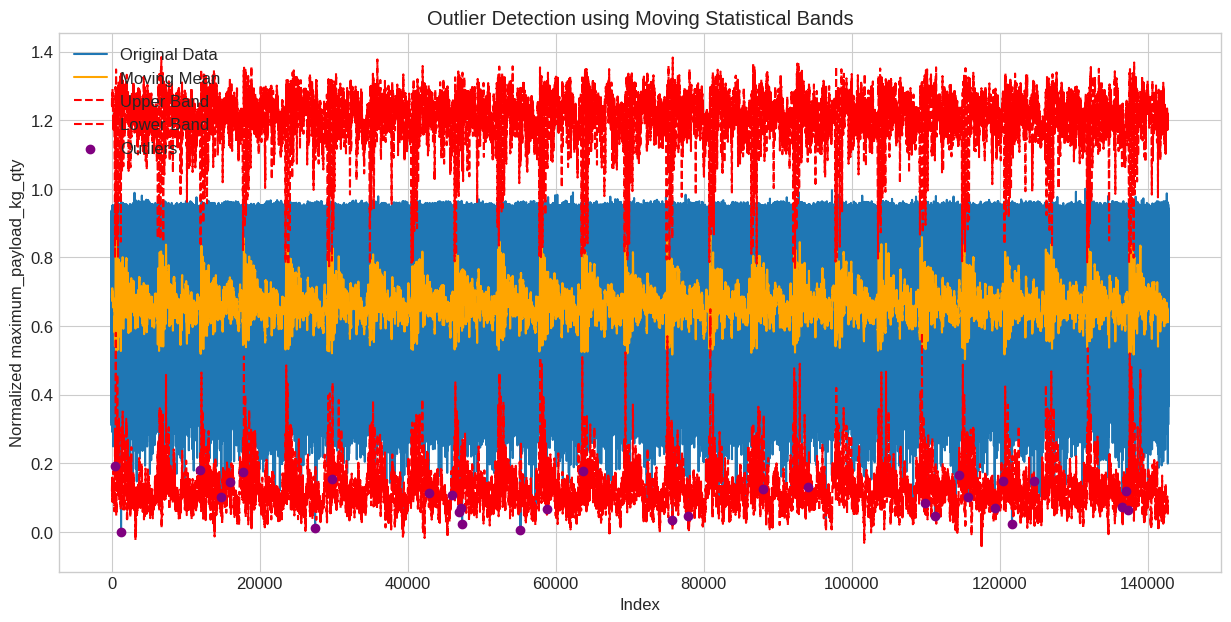

Detected Outliers:
        maximum_payload_kg_qty  moving_mean  upper_band  lower_band
496                   0.191183     0.582935    0.971788    0.194082
1288                  0.000000     0.604476    1.104692    0.104260
12011                 0.180023     0.535739    0.848339    0.223139
14836                 0.100894     0.669875    1.228382    0.111367
15991                 0.145937     0.739036    1.309412    0.168660
17793                 0.173459     0.571577    0.936193    0.206961
27500                 0.011665     0.634861    1.183376    0.086346
29771                 0.154775     0.532444    0.875361    0.189528
42819                 0.114175     0.673378    1.218448    0.128308
45961                 0.107307     0.644201    1.148129    0.140274
46929                 0.057466     0.599348    1.127898    0.070797
47206                 0.068424     0.613428    1.122401    0.104454
47356                 0.023582     0.612351    1.115784    0.108919
55240                 0.00540

In [8]:
def detect_outliers_moving_bands(data, column, window_size=30, std_multiplier=2):
    """
    Detects outliers using moving statistical bands.

    Args:
        data (pd.DataFrame): The input DataFrame.
        column (str): The column to detect outliers in.
        window_size (int): The size of the moving window.
        std_multiplier (int): The multiplier for the standard deviation to set the band width.

    Returns:
        pd.DataFrame: The DataFrame with an added 'is_outlier' column.
    """
    data['moving_mean'] = data[column].rolling(window=window_size, center=True).mean()
    data['moving_std'] = data[column].rolling(window=window_size, center=True).std()

    data['upper_band'] = data['moving_mean'] + std_multiplier * data['moving_std']
    data['lower_band'] = data['moving_mean'] - std_multiplier * data['moving_std']


    data['is_outlier'] = ((data[column] > data['upper_band']) | (data[column] < data['lower_band'])).astype(int)

    return data


data_normalized = detect_outliers_moving_bands(data_normalized, 'maximum_payload_kg_qty', window_size=100, std_multiplier=3)


plt.figure(figsize=(15, 7))
plt.plot(data_normalized.index, data_normalized['maximum_payload_kg_qty'], label='Original Data')
plt.plot(data_normalized.index, data_normalized['moving_mean'], label='Moving Mean', color='orange')
plt.plot(data_normalized.index, data_normalized['upper_band'], label='Upper Band', color='red', linestyle='--')
plt.plot(data_normalized.index, data_normalized['lower_band'], label='Lower Band', color='red', linestyle='--')
plt.scatter(data_normalized[data_normalized['is_outlier'] == 1].index,
            data_normalized[data_normalized['is_outlier'] == 1]['maximum_payload_kg_qty'],
            color='purple', label='Outliers', zorder=5)
plt.title('Outlier Detection using Moving Statistical Bands')
plt.xlabel('Index')
plt.ylabel('Normalized maximum_payload_kg_qty')
plt.legend()
plt.show()


outliers = data_normalized[data_normalized['is_outlier'] == 1]
print("Detected Outliers:")
print(outliers[['maximum_payload_kg_qty', 'moving_mean', 'upper_band', 'lower_band']])


In [9]:
data_cleaned = data_normalized[data_normalized['is_outlier'] == 0].copy()
data_cleaned = data_cleaned.drop(columns=['moving_mean', 'moving_std', 'upper_band', 'lower_band', 'is_outlier'])

print("\nData after removing outliers (data_cleaned):")
print(data_cleaned.head())
print("\nInfo of data_cleaned:")
data_cleaned.info()


Data after removing outliers (data_cleaned):
   pax_weight_kg_qty  crew_bags_gross_weight_kg_qty  \
0           0.704730                            0.0   
1           0.254082                            0.0   
2           0.565849                            0.0   
3           0.373660                            0.0   
4           0.665395                            0.0   

   pax_bags_gross_weight_kg_qty  cargo_gross_weight_kg_qty  \
0                      0.197436                   0.065504   
1                      0.052431                   0.000000   
2                      0.113528                   0.044832   
3                      0.135809                   0.027024   
4                      0.134041                   0.000000   

   maximum_payload_kg_qty  
0                0.552846  
1                0.680705  
2                0.321163  
3                0.578700  
4                0.466899  

Info of data_cleaned:
<class 'pandas.core.frame.DataFrame'>
Index: 142723 entries

In [10]:
data_cleaned.dropna(subset=['pax_weight_kg_qty'], inplace=True)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142674 entries, 0 to 142753
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   pax_weight_kg_qty              142674 non-null  float64
 1   crew_bags_gross_weight_kg_qty  142674 non-null  float64
 2   pax_bags_gross_weight_kg_qty   142674 non-null  float64
 3   cargo_gross_weight_kg_qty      142674 non-null  float64
 4   maximum_payload_kg_qty         142674 non-null  float64
dtypes: float64(5)
memory usage: 6.5 MB


In [11]:
from sklearn.model_selection import train_test_split

X = data_cleaned.drop('maximum_payload_kg_qty', axis=1)
y = data_cleaned['maximum_payload_kg_qty']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (114139, 4)
Shape of X_test: (28535, 4)
Shape of y_train: (114139,)
Shape of y_test: (28535,)


Mean Squared Error (MSE): 0.03808861926021761
Root Mean Squared Error (RMSE): 0.19516305813400653
R-squared (R2) Score: -0.10322879639122351


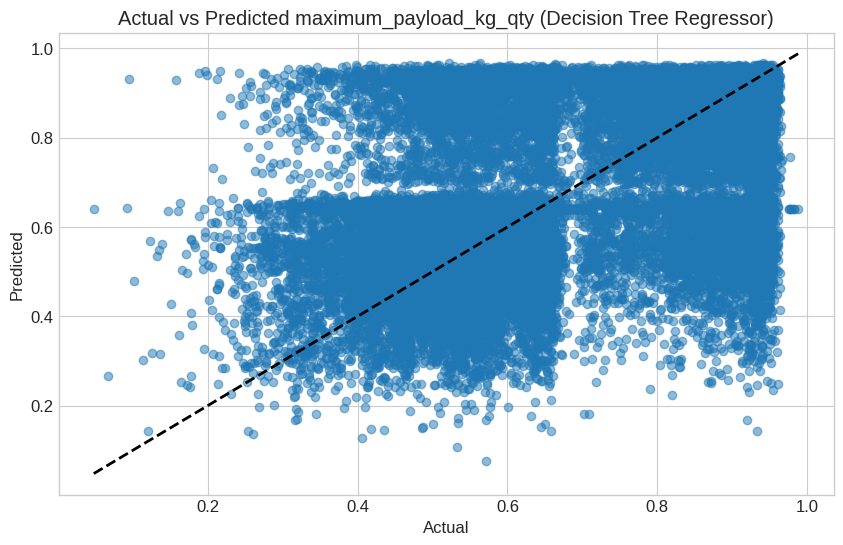

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

cart_regressor = DecisionTreeRegressor(random_state=42)

cart_regressor.fit(X_train, y_train)

y_pred = cart_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted maximum_payload_kg_qty (Decision Tree Regressor)")
plt.show()


In [13]:
model_A = cart_regressor

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2854/2854 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0301 - val_loss: 0.0236
Epoch 2/100
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0202 - val_loss: 0.0211
Epoch 3/100
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0199 - val_loss: 0.0200
Epoch 4/100
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0195 - val_loss: 0.0198
Epoch 5/100
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0194 - val_loss: 0.0194
Epoch 6/100
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0197 - val_loss: 0.0198
Epoch 7/100
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0195 - val_loss: 0.0194
Epoch 8/100
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0196 - val_loss: 0.0194
Epoch 9/100
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0195 - val_loss: 0.0194
Epoch 10/100
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0195 - val_loss: 0.0196
Epoch 11/100
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0194 - val_loss: 0.0194
Epoch 12/100
2854/2854 ━━━━━━━

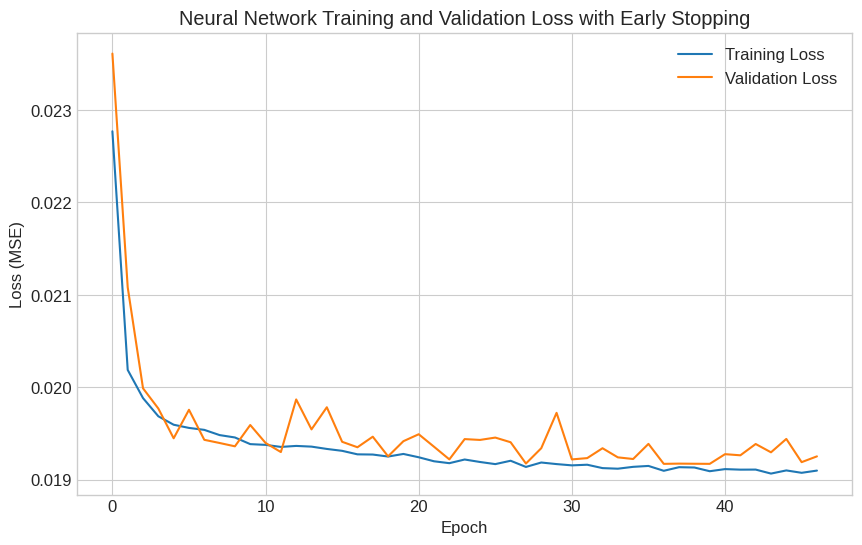

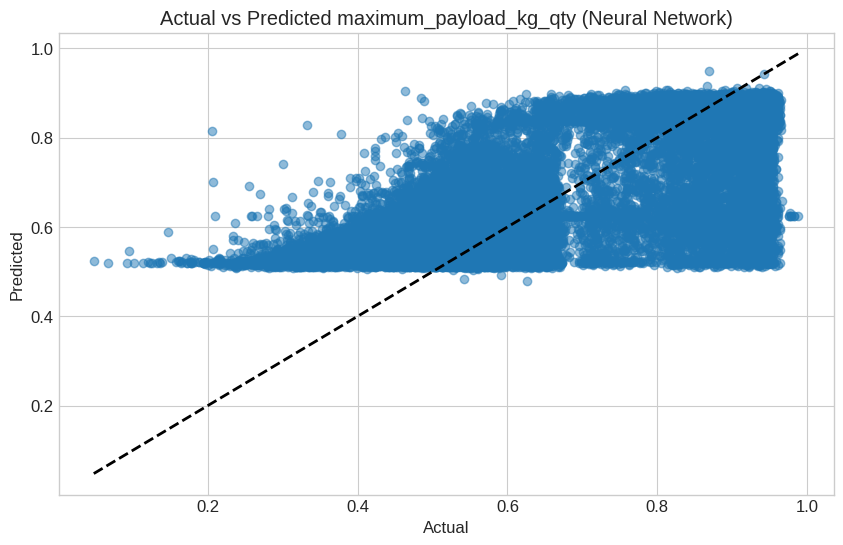


Interpretación de los resultados de la Red Neuronal:

Mean Squared Error (MSE) en datos de prueba: 0.0187

R-squared (R2) Score en datos de prueba: 0.4570


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


model_nn = Sequential([

    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),

    Dense(64, activation='relu'),

    Dense(1)
])


model_nn.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_nn.fit(X_train, y_train,
                       validation_split=0.2,
                       epochs=100,
                       batch_size=32,
                       callbacks=[early_stopping],
                       verbose=1)


loss = model_nn.evaluate(X_test, y_test, verbose=0)
print(f"\nMean Squared Error (MSE) on Test Data (Neural Network): {loss:.4f}")


y_pred_nn = model_nn.predict(X_test)


r2_nn = r2_score(y_test, y_pred_nn)
print(f"R-squared (R2) Score on Test Data (Neural Network): {r2_nn:.4f}")


plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Training and Validation Loss with Early Stopping')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted maximum_payload_kg_qty (Neural Network)")
plt.show()

print("\nInterpretación de los resultados de la Red Neuronal:")
print(f"\nMean Squared Error (MSE) en datos de prueba: {loss:.4f}")

print(f"\nR-squared (R2) Score en datos de prueba: {r2_nn:.4f}")


In [15]:
model_B = model_nn

/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 950us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 964us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step
gen	nevals	avg     	std       	min     	max    
0  	10    	0.438312	0.00752123	0.428471	0.44781


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 899us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 869us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 876us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 964us/step
1  	8     	0.44173 	0.00819641	0.420219	0.448837


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 823us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
2  	8     	0.441717	0.00457741	0.434983	0.448837


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 860us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 961us/step
3  	10    	0.439447	0.00892024	0.424334	0.448353

--- Genetic Algorithm Results ---
Best Hyperparameters found:
  Number of Neurons: 115
  Learning Rate: 0.001255
  Best R2 Score achieved during optimization: 0.4488

--- Training the final model_C with best hyperparameters ---
Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2854/2854 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0373 - val_loss: 0.0209
Epoch 2/200
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0206 - val_loss: 0.0202
Epoch 3/200
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0203 - val_loss: 0.0204
Epoch 4/200
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0202 - val_loss: 0.0201
Epoch 5/200
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0203 - val_loss: 0.0199
Epoch 6/200
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0201 - val_loss: 0.0199
Epoch 7/200
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0196 - val_loss: 0.0196
Epoch 8/200
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0198 - val_loss: 0.0200
Epoch 9/200
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0197 - val_loss: 0.0202
Epoch 10/200
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0196 - val_loss: 0.0197
Epoch 11/200
2854/2854 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0196 - val_loss: 0.0196
Epoch 12/200
2854/2854 ━━━━

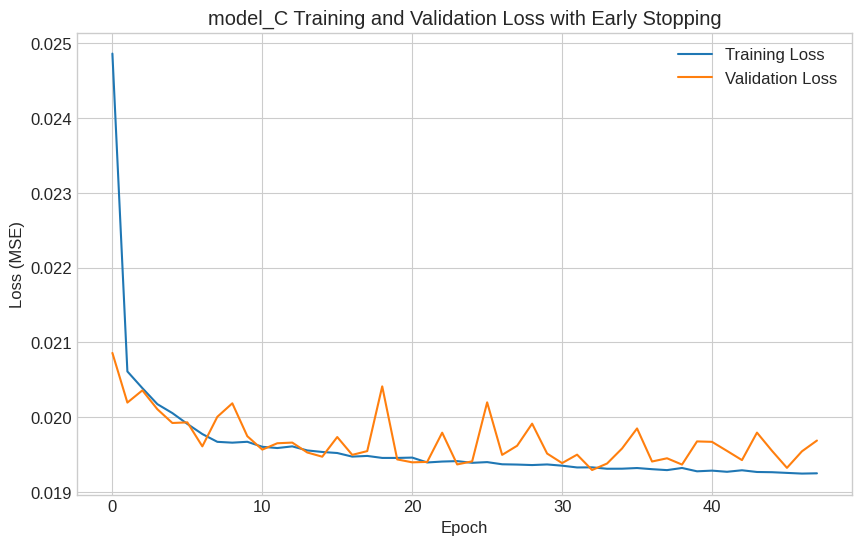

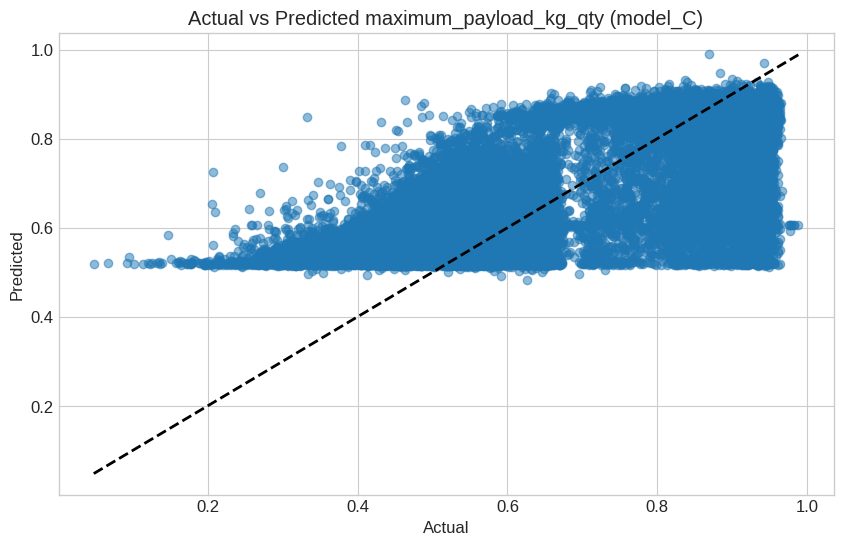


Details of model_C:


Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_103 (Dense)               │ (None, 115)            │           575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 1)              │           116 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,075 (8.11 KB)

 Trainable params: 691 (2.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,384 (5.41 KB)


Interpretación de los resultados de model_C (Red Neuronal de una capa optimizada con GA):

Mean Squared Error (MSE) en datos de prueba: 0.0189

R-squared (R2) Score en datos de prueba: 0.4528

Comparación de R2 Scores:
  model_A (Decision Tree): -0.1032
  model_B (Multi-layer NN): 0.4570
  model_C (Single-layer NN optimized with GA): 0.4528


In [18]:
# prompt: utiliza un algoritmo genetico para encontrar los mejores hiperparámetros para  model_A; dame detalles sobre la función de aptitud, población, estrategías de cruce y mutación; ademas que solo tenga una capa; llamale a este nuevo modelo "model_C"; QUIERO MAXIMIZAR EL PERFORMANCE DE R2 SCORE

!pip install deap

import random
import numpy as np
from deap import base, creator, tools, algorithms
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score

# Define the fitness function
# The fitness function will build and train a single-layer neural network with the given hyperparameters
# and return the R2 score on the test set (to be maximized).
def evaluate_model(individual, X_train, y_train, X_test, y_test):
  """
  Evaluates a single-layer neural network with the given hyperparameters.

  Args:
    individual (list): A list representing the hyperparameters [num_neurons, learning_rate].
    X_train, y_train: Training data.
    X_test, y_test: Testing data.

  Returns:
    tuple: The R2 score on the test set (as a tuple for DEAP).
  """
  num_neurons, learning_rate = individual

  model_C = Sequential([
      Dense(num_neurons, input_shape=(X_train.shape[1],), activation='relu')
  ])
  # Add a Dense layer for the output (assuming regression)
  model_C.add(Dense(1))


  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model_C.compile(optimizer=optimizer, loss='mean_squared_error')

  # Train the model (using a small number of epochs for speed during optimization)
  # In a real application, you might want to use more epochs or EarlyStopping
  model_C.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

  # Predict and calculate R2
  y_pred_C = model_C.predict(X_test)
  r2_C = r2_score(y_test, y_pred_C)

  # DEAP expects a tuple for the fitness
  return (r2_C,)

# Genetic Algorithm Setup

# Creator: Define the fitness (we want to maximize R2) and the individual
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Toolbox: Define the genetic operators
toolbox = base.Toolbox()

# Attribute generator: Generate random hyperparameters
# num_neurons: Integer between 16 and 128
# learning_rate: Float between 0.0001 and 0.01 (logarithmic scale might be better for learning rates)
toolbox.register("attr_num_neurons", random.randint, 16, 128)
toolbox.register("attr_learning_rate", lambda: 10**random.uniform(-4, -2)) # Using a log-uniform distribution

# Structure initializer: Create an individual (a list of hyperparameters)
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_num_neurons, toolbox.attr_learning_rate), n=1)

# Population initializer: Create a population of individuals
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# --- Genetic Operators ---

# Fitness function: Use the evaluate_model function
toolbox.register("evaluate", evaluate_model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Selection: Tournament selection
toolbox.register("select", tools.selTournament, tournsize=3)

# Crossover: Two-point crossover
toolbox.register("mate", tools.cxTwoPoint)

# Mutation: Mutate either num_neurons or learning_rate
def mutate_individual(individual, indpb):
  """Mutate the individual by changing num_neurons or learning_rate."""
  if random.random() < indpb:
    # Mutate num_neurons
    individual[0] = random.randint(16, 128)
  if random.random() < indpb:
    # Mutate learning_rate (log-uniform mutation)
    individual[1] = 10**random.uniform(-4, -2)
  return individual,

toolbox.register("mutate", mutate_individual, indpb=0.2) # indpb is the probability of mutating each attribute

# --- Genetic Algorithm Parameters ---
population_size = 10
num_generations = 3
crossover_prob = 0.7
mutation_prob = 0.3

# --- Run the Genetic Algorithm ---

# Create an initial population
pop = toolbox.population(n=population_size)

# Hall of fame to store the best individual
hof = tools.HallOfFame(1)

# Stats to track the evolution
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

# The genetic algorithm flow
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=crossover_prob, mutpb=mutation_prob, ngen=num_generations,
                               stats=stats, halloffame=hof, verbose=True)

# --- Results ---
print("\n--- Genetic Algorithm Results ---")
best_individual = hof[0]
best_num_neurons, best_learning_rate = best_individual
best_r2 = best_individual.fitness.values[0]

print(f"Best Hyperparameters found:")
print(f"  Number of Neurons: {best_num_neurons}")
print(f"  Learning Rate: {best_learning_rate:.6f}")
print(f"  Best R2 Score achieved during optimization: {best_r2:.4f}")

# --- Train the final model with the best hyperparameters ---
print("\n--- Training the final model_C with best hyperparameters ---")
model_C = Sequential([
    Dense(best_num_neurons, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(1)
])

optimizer_C = tf.keras.optimizers.Adam(learning_rate=best_learning_rate)
model_C.compile(optimizer=optimizer_C, loss='mean_squared_error')

# Train the final model for a reasonable number of epochs or with EarlyStopping
early_stopping_C = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history_C = model_C.fit(X_train, y_train,
                        validation_split=0.2,
                        epochs=200, # Use more epochs for the final model
                        batch_size=32,
                        callbacks=[early_stopping_C],
                        verbose=1)

# Evaluate the final model
loss_C = model_C.evaluate(X_test, y_test, verbose=0)
y_pred_C_final = model_C.predict(X_test)
r2_C_final = r2_score(y_test, y_pred_C_final)

print(f"\nMean Squared Error (MSE) on Test Data (model_C): {loss_C:.4f}")
print(f"R-squared (R2) Score on Test Data (model_C): {r2_C_final:.4f}")

# Plotting results for model_C
plt.figure(figsize=(10, 6))
plt.plot(history_C.history['loss'], label='Training Loss')
plt.plot(history_C.history['val_loss'], label='Validation Loss')
plt.title('model_C Training and Validation Loss with Early Stopping')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_C_final, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted maximum_payload_kg_qty (model_C)")
plt.show()

print("\nDetails of model_C:")
model_C.summary()

print("\nInterpretación de los resultados de model_C (Red Neuronal de una capa optimizada con GA):")
print(f"\nMean Squared Error (MSE) en datos de prueba: {loss_C:.4f}")
print(f"\nR-squared (R2) Score en datos de prueba: {r2_C_final:.4f}")

# Compare R2 with model_A (Decision Tree) and model_B (Multi-layer NN)
print("\nComparación de R2 Scores:")
# Ensure model_A and model_B are defined from the preceding code
if 'r2' in globals():
    print(f"  model_A (Decision Tree): {r2:.4f}")
else:
    print("  model_A (Decision Tree) R2 not available from preceding code.")

if 'r2_nn' in globals():
    print(f"  model_B (Multi-layer NN): {r2_nn:.4f}")
else:
     print("  model_B (Multi-layer NN) R2 not available from preceding code.")

print(f"  model_C (Single-layer NN optimized with GA): {r2_C_final:.4f}")



Entrenando el modelo de ensamble con Gradient Boosting...

--- Resultados del Modelo de Ensamble con Gradient Boosting ---
Mean Squared Error (MSE): 0.0186
R-squared (R2) Score: 0.4599

--- Comparación de Resultados (MSE y R2 Score) ---

Mean Squared Error (MSE):
  Modelo A (Decision Tree): 0.0381
  Modelo B (Red Neuronal Multicapa): 0.0187
  Modelo C (Red Neuronal Capa Única Optimizada con GA): 0.0189
  Modelo de Ensamble (Gradient Boosting): 0.0186

R-squared (R2) Score:
  Modelo A (Decision Tree): -0.1032
  Modelo B (Red Neuronal Multicapa): 0.4570
  Modelo C (Red Neuronal Capa Única Optimizada con GA): 0.4528
  Modelo de Ensamble (Gradient Boosting): 0.4599


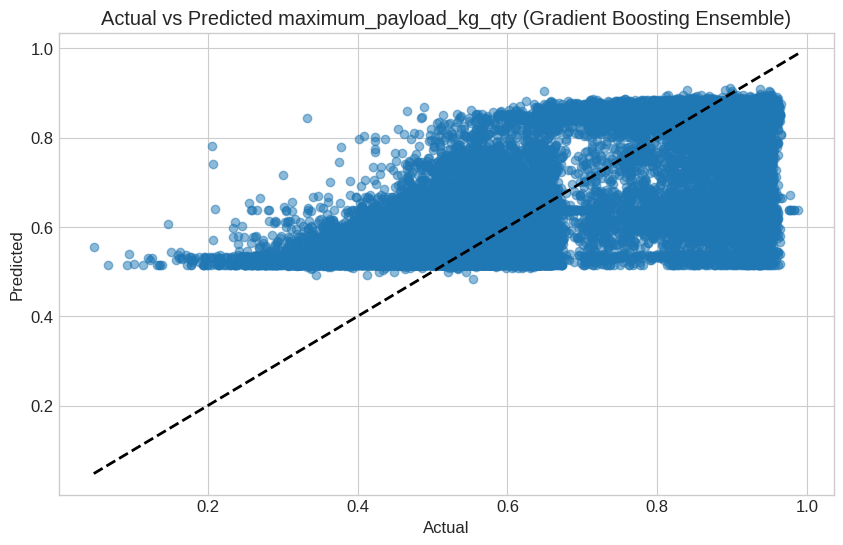

In [19]:
# prompt: Ahora con los modelos A,B y C, por favor realiza un modelo de ensamble con gradient boosting y comparame los resultados de MSE y R2 SCORE

from sklearn.ensemble import GradientBoostingRegressor

# Create and train the Gradient Boosting model (Ensemble model)
gbr_ensemble = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

print("\nEntrenando el modelo de ensamble con Gradient Boosting...")
gbr_ensemble.fit(X_train, y_train)

# Predict using the ensemble model
y_pred_ensemble = gbr_ensemble.predict(X_test)

# Evaluate the ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print("\n--- Resultados del Modelo de Ensamble con Gradient Boosting ---")
print(f"Mean Squared Error (MSE): {mse_ensemble:.4f}")
print(f"R-squared (R2) Score: {r2_ensemble:.4f}")

# Compare the results
print("\n--- Comparación de Resultados (MSE y R2 Score) ---")

print("\nMean Squared Error (MSE):")
print(f"  Modelo A (Decision Tree): {mse:.4f}")
print(f"  Modelo B (Red Neuronal Multicapa): {loss:.4f}") # loss is the MSE for model_B
print(f"  Modelo C (Red Neuronal Capa Única Optimizada con GA): {loss_C:.4f}")
print(f"  Modelo de Ensamble (Gradient Boosting): {mse_ensemble:.4f}")

print("\nR-squared (R2) Score:")
print(f"  Modelo A (Decision Tree): {r2:.4f}")
print(f"  Modelo B (Red Neuronal Multicapa): {r2_nn:.4f}")
print(f"  Modelo C (Red Neuronal Capa Única Optimizada con GA): {r2_C_final:.4f}")
print(f"  Modelo de Ensamble (Gradient Boosting): {r2_ensemble:.4f}")

# Plotting the results for the ensemble model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ensemble, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted maximum_payload_kg_qty (Gradient Boosting Ensemble)")
plt.show()
